In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [17]:
from pathlib import Path
csvpath = Path('./Resources/berkshire_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.tail(10)

,Market Return,Portfolio Return without Rebalancing,Portfolio Return with Rebalancing,Portfolio Return with Lagged Rebalancing
Date,,,,
2020-08-06,1.232752,1.180775,1.192096,1.131888
2020-08-07,1.233637,1.185307,1.193217,1.135988
2020-08-10,1.237324,1.189283,1.194952,1.139038
2020-08-11,1.227258,1.184985,1.188373,1.135230
2020-08-12,1.244220,1.197282,1.202515,1.146742
2020-08-17,1.245916,1.194151,1.200419,1.142858
2020-08-18,1.248645,1.194205,1.201130,1.143457
2020-08-19,1.243482,1.190578,1.197926,1.140422
2020-08-20,1.247281,1.192166,1.202183,1.144355


In [18]:
df = df.iloc[1:]
df.head()

,Market Return,Portfolio Return without Rebalancing,Portfolio Return with Rebalancing,Portfolio Return with Lagged Rebalancing
Date,,,,
2018-07-02,1.002766,1.003619,1.003619,NaN
2018-07-03,0.998673,0.996927,0.996927,NaN
2018-07-05,1.007006,1.005320,1.005320,NaN
2018-07-06,1.015414,1.011935,1.011935,NaN
2018-07-09,1.024706,1.024373,1.024373,NaN


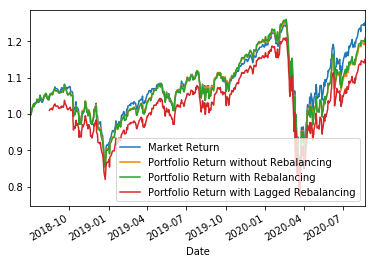

In [19]:
df.plot()

In [20]:
# dropping out two columns
dataset = df.drop(columns=['Portfolio Return without Rebalancing', 'Portfolio Return with Lagged Rebalancing'])
dataset.head(2)

,Market Return,Portfolio Return with Rebalancing
Date,,
2018-07-02,1.002766,1.003619
2018-07-03,0.998673,0.996927


In [21]:
portfolio = df["Portfolio Return with Rebalancing"].to_frame().dropna()
portfolio.head(2)

,Portfolio Return with Rebalancing
Date,
2018-07-02,1.003619
2018-07-03,0.996927


In [22]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(portfolio,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2886.713, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2842.876, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2883.445, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2872.225, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2844.608, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2887.862, Time=0.90 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2891.925, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2894.708, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2902.052, Time=0.76 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2901.004, Time=1.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2899.502, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2930.179, Time=1.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2923.387, Time=1.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2894.403, Time=0.69 sec
 ARIMA(4,1,2)(0,0,0

In [ ]:
step_wise.summary()

## SARIMAX Model

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
# Create a SARIMAX model
model = SARIMAX(portfolio, order=(3, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
# Fit the model to the data
results = model.fit()

In [26]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Portfolio Return with Rebalancing   No. Observations:                  538
Model:                              SARIMAX(3, 1, 1)   Log Likelihood                1451.467
Date:                               Mon, 24 Aug 2020   AIC                          -2892.935
Time:                                       23:31:04   BIC                          -2871.505
Sample:                                            0   HQIC                         -2884.552
                                               - 538                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1420      0.238     -0.596      0.551      -0.609       0.325
ar.L2          0.1885      0.060      3.144      0.002       0.071       0.306
ar.L3          0.0798      0.045      1.759      0.079      -0.009       0.169
ma.L1         -0.1085      0.250     -0.435      0.664      -0.598       0.381
sigma2         0.0003   7.02e-06     37.421      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      102.01   Jarque-Bera (JB):              2661.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.38   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
results.forecast(steps=30)

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


538    1.207236
539    1.208918
540    1.208954
541    1.209171
542    1.209281
543    1.209310
544    1.209344
545    1.209353
546    1.209360
547    1.209364
548    1.209366
549    1.209367
550    1.209367
551    1.209367
552    1.209367
553    1.209367
554    1.209367
555    1.209367
556    1.209367
557    1.209367
558    1.209367
559    1.209367
560    1.209367
561    1.209367
562    1.209367
563    1.209367
564    1.209367
565    1.209367
566    1.209367
567    1.209367
dtype: float64

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


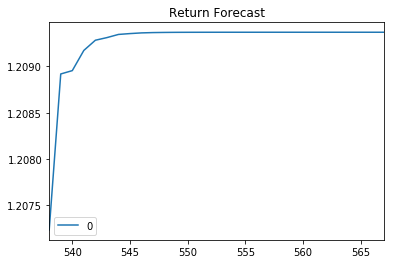

In [32]:
# create a dataframe that holds the forecast values.
return_forecast = pd.DataFrame(results.forecast(steps=30))
# Visualize the forecast
return_forecast.plot(title="Return Forecast")

## Forecast Market Return

In [33]:
market = df["Market Return"].to_frame().dropna()
market.head(2)

,Market Return
Date,
2018-07-02,1.002766
2018-07-03,0.998673


In [34]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(market,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2946.308, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2907.627, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2942.425, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2932.675, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2909.181, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2951.490, Time=1.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2952.185, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2953.594, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2960.419, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2960.733, Time=0.58 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2965.183, Time=0.73 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-2989.695, Time=1.25 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-3000.175, Time=2.36 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2992.149, Time=2.02 sec
 ARIMA(7,1,2)(0,0,0

In [ ]:
step_wise.summary()

In [35]:
# Create an SARIMAX model
model_1 = SARIMAX(market, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [36]:
# Fit the model to the data
results_1 = model_1.fit()

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
# Print the model summary
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Market Return   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1510.165
Date:                Mon, 24 Aug 2020   AIC                          -3002.329
Time:                        23:42:24   BIC                          -2963.755
Sample:                             0   HQIC                         -2987.239
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6789      0.078     -8.699      0.000      -0.832      -0.526
ar.L2          0.0733      0.031      2.332      0.020       0.012       0.135
ar.L3          0.1520      0.031      4.874      0.000       0.091       0.213
ar.L4         -0.0928      0.031     -2.981      0.003      -0.154      -0.032
ar.L5         -0.0504      0.038     -1.328      0.184      -0.125       0.024
ar.L6         -0.0294      0.035     -0.845      0.398      -0.097       0.039
ar.L7          0.1906      0.033      5.712      0.000       0.125       0.256
ma.L1          0.5496      0.080      6.837      0.000       0.392       0.707
sigma2         0.0002   6.42e-06     32.755      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       35.81   Jarque-Bera (JB):              1410.14
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


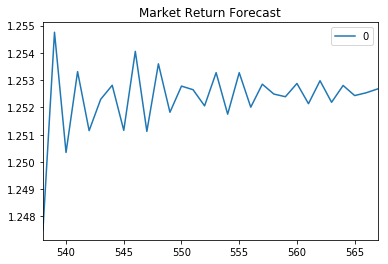

In [39]:
# create a dataframe that holds the forecast values.
market_return_forecast = pd.DataFrame(results_1.forecast(steps=30))

# Visualize the forecast
market_return_forecast.plot(title="Market Return Forecast")

In [40]:
# concatenate the dataframes
forecast_df = pd.concat([return_forecast, market_return_forecast], axis=1)
forecast_df.columns = ["Portfolio Return Forecast", "Market Return Forecast"]
forecast_df.head()

,Portfolio Return Forecast,Market Return Forecast
538,1.207236,1.247508
539,1.208918,1.254757
540,1.208954,1.250348
541,1.209171,1.253314
542,1.209281,1.251148


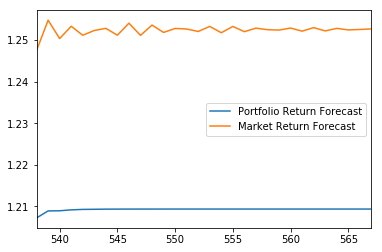

In [41]:
forecast_df.plot()